## Dataset analysis

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# We check if the dataset is unbalanced

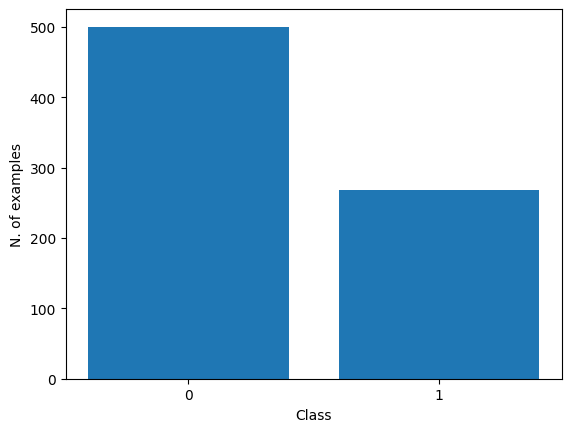

In [55]:
data = pd.read_csv('Dataset/diabetes.csv')

class_counts = data['Outcome'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xticks(class_counts.index)
plt.xlabel('Class')
plt.ylabel('N. of examples')
plt.show()

# Checking for null values

In [56]:
# Checking for null values

print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Correlation Matrix

                          Pregnancies   Glucose  BloodPressure  SkinThickness   
Pregnancies                  1.000000  0.129459       0.141282      -0.081672  \
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction   
Pregnancies              -0.073535  0.017683                 -0.033523  \
Glucose                   0.331357  0.221

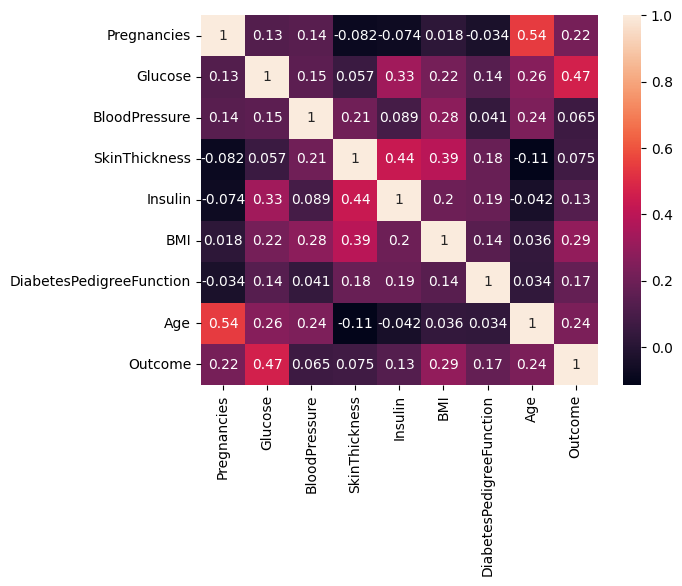

In [57]:
corr_matrix = data.corr()

print(corr_matrix)

# Let visualize the correlation matrix as a heatmap

sns.heatmap(corr_matrix, annot=True)
plt.show()

We can see that some variables have a strong correlation with the outcome. For example, blood glucose has a strong positive correlation with outcome.

# Checking for the mean of  glicemy for each class

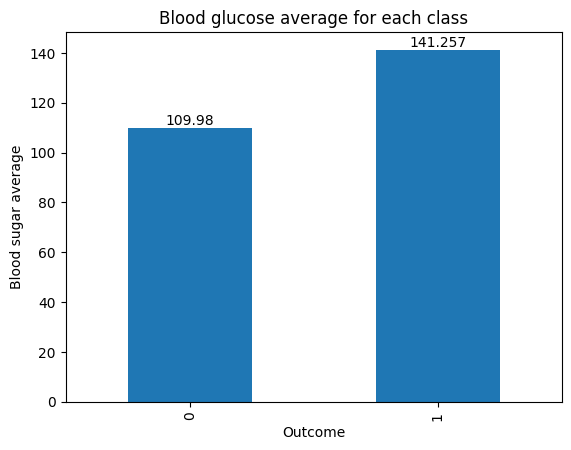

In [58]:
# Calculate the glicemy average for each class
glucose_mean = data.groupby('Outcome')['Glucose'].mean()


# Create a bar chart to view the glicdemy average for each class
ax = glucose_mean.plot(kind='bar')
plt.title('Blood glucose average for each class')
plt.xlabel('Outcome')
plt.ylabel('Blood sugar average')

# Adding labels to datas
for i in ax.containers:
    ax.bar_label(i)

plt.show()

The mean for class 0 (failure) is 109.98 and for class 1 (success) it is 141.257. This suggests that there is a difference between the two classes in terms of mean glucose levels. In particular, class 1 (positive result) has higher mean glucose levels than class 0 (negative result).

# Let's calculate the Z-score for the glucose.

The z-score is a standardized measure of how many standard deviations an observation or value is above or below the mean.

In [59]:
from scipy import stats

# Select the variable for which to calculate the Z-score
variable = 'Glucose'

# Calculates the Z score for each value of the variable
z_scores = stats.zscore(data[variable])

# Aggiungi lo score Z al DataFrame
data['Z_Score'] = z_scores

# Identify outliers in the Glucose variable
outliers = data[(data['Z_Score'] > 3) | (data['Z_Score'] < -3)]

# View outliers
print(outliers)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
75             1        0             48             20        0  24.7  \
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome   Z_Score  
75                      0.140   22        0 -3.783654  
182                     0.299   21        0 -3.783654  
342                     0.389   22        0 -3.783654  
349                     0.346   37        1 -3.783654  
502                     0.727   41        1 -3.783654  


# Z-score for all variables

In [64]:
from scipy import stats


# Select the columns for which to calculate the Z-score (all columns without the outcome)
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Calculate the Z score for each column
for column in columns:
    z_scores = stats.zscore(data[column])
    data[f'{column}_Z_Score'] = z_scores

# Identify outliers for each column
for column in columns:
    outliers = data[(data[f'{column}_Z_Score'] > 3) | (data[f'{column}_Z_Score'] < -3)]
    print(f'Outliers for {column}:')
    print(outliers)


Outliers for Pregnancies:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
88            15      136             70             32      110  37.1  \
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome   Z_Score  Pregnancies_Z_Score   
88                      0.153   43        1  0.472758             3.312645  \
159                     0.817   47        1  1.317781             3.906578   
298                     0.412   46        1 -0.653939             3.015679   
455                     0.212   38        1  1.693347             3.015679   

     Glucose_Z_Score  BloodPressure_Z_Score  SkinThickness_Z_Score   
88          0.472758               0.046245               0.719086  \
159         1.317781               0.149641               1.283638   
29

There are some outliers in the glucose variable and not only, with values of 0. These values could be measurement or data recording errors

# Test T of Student

In [61]:
import numpy as np

# Separate input features from output class
features = data.drop(['Outcome'], axis=1)
labels = data['Outcome']

# Split dataset by class
class_0_data = features[labels == 0]
class_1_data = features[labels == 1]

# Perform Student's t-test for each feature
for feature in features.columns:

    # Calculate the average of the features for each class
    mean_0 = class_0_data[feature].mean()
    mean_1 = class_1_data[feature].mean()

    # Calculate the standard deviation of features for each class
    std_0 = class_0_data[feature].std()
    std_1 = class_1_data[feature].std()

    # Calculate the number of samples for each class
    n_0 = len(class_0_data)
    n_1 = len(class_1_data)

    # Calculate t-score using Student's t-test formula
    t_score = (mean_1 - mean_0) / np.sqrt((std_1**2 / n_1) + (std_0**2 / n_0))

    # Calcola il numero di gradi di libertà
    df = n_0 + n_1 - 2
    
    # Calculate p-value using the t-distribution
    p_value = stats.t.sf(np.abs(t_score), df) * 2

    # Print results
    print(f"Feature: {feature}")
    print(f"t-score: {t_score}")
    print(f"p-value: {p_value}")
    print("--------------------")

Feature: Pregnancies
t-score: 5.9069614794974905
p-value: 5.23873590561743e-09
--------------------
Feature: Glucose
t-score: 13.751537067396413
p-value: 1.285810752675778e-38
--------------------
Feature: BloodPressure
t-score: 1.7130865949770784
p-value: 0.08710125149763945
--------------------
Feature: SkinThickness
t-score: 1.9705792220450482
p-value: 0.049131737507091384
--------------------
Feature: Insulin
t-score: 3.3008947714793337
p-value: 0.0010083951144375554
--------------------
Feature: BMI
t-score: 8.619316881357944
p-value: 3.8326298584819114e-17
--------------------
Feature: DiabetesPedigreeFunction
t-score: 4.576812008291278
p-value: 5.506648713067685e-06
--------------------
Feature: Age
t-score: 6.920738378988039
p-value: 9.501623564568652e-12
--------------------
Feature: Z_Score
t-score: 13.75153706739642
p-value: 1.285810752675686e-38
--------------------
Feature: Pregnancies_Z_Score
t-score: 5.906961479497492
p-value: 5.238735905617352e-09
--------------------
F